# Notebook 2: Graphical Summaries of Data
***

In this notebook you'll apply some basic Pandas tools to perform graphical summaries data.

First, as always, we'll load Numpy and Pandas using their common aliases, np and pd.


In [1]:
import numpy as np
import pandas as pd

We also need to load Matplotlib's Pylab library and to set up Jupyter so that it will plot directly in the notebook. 

$\color{red}{\text{Pylab}}$ - PyLab is a procedural interface to the Matplotlib object-oriented plotting library.

$\phantom{xxx}$ `Matplotlib` is the whole package.

$\phantom{xxx}$ `matplotlib.pyplot` is a module in Matplotlib.

$\phantom{xxx}$ `PyLab` is a module that gets installed alongside Matplotlib.

$\phantom{xxx}$ `PyLab` is a convenience module that bulk imports matplotlib.pyplot (for plotting) and NumPy (for Mathematics and working with arrays) in a single name space.

In [2]:
import matplotlib.pylab as plt
%matplotlib inline 
    # 'inline' puts your graph in the cell versus popup window

## I) Descriptive Statistics in Python


In our previous lesson we defined various descriptive statistics that are useful when analzying data.  Here we will practice calculating these in Python.

In [3]:
#Let's read in the same dataset from our last lecture.  We'll explore the difference using Pandas Series vs Numpy array

datapd=pd.Series([19, 3, 4, 5, 4, 3, 4])

datanp=np.array([19,3,4,5,4,3,4])




In [4]:
#You can calculate summary statistics like mean, variance, etc using built-in methods
print("Mean of Numpy array:",datanp.mean())

print("Mean of Pandas Series:",datapd.mean())

print("Variance of Numpy array:",datanp.var())

print("Variance of Pandas Series:",datapd.var())


Mean of Numpy array: 6.0
Mean of Pandas Series: 6.0
Variance of Numpy array: 28.571428571428573
Variance of Pandas Series: 33.333333333333336


WARNING!!! Notice **we got different values for the variance even though we are using the same data**.  
Why?!



Numpy is calculating the variance assuming we have **population** data by default, while Pandas is calculating the variance assuming we have **sample** data by default:

Recall:

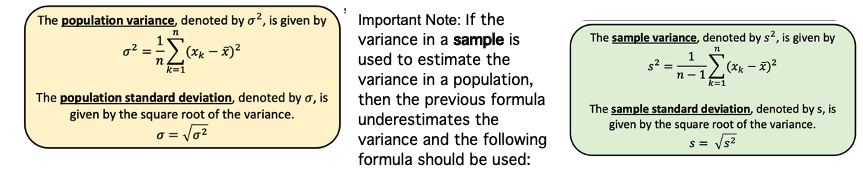


You can specify what you want to calculate by setting the parameter `ddof`

`ddof = 0` calculates the population variance (default in Numpy arrays)

`ddof=1` calculates the sample variance (default in Pandas Series and DataFrames)


In [5]:
print("Sample variance of Numpy array:",datanp.var(ddof=1))

print("Sample Variance of Pandas Series:",datapd.var())

Sample variance of Numpy array: 33.333333333333336
Sample Variance of Pandas Series: 33.333333333333336


Pandas has a nice built-in `describe` method that gives descriptive statistics:
(Note that since this in Pandas, the standard deviation given here is the sample standard deviation)

In [6]:
datapd.describe()

count     7.000000
mean      6.000000
std       5.773503
min       3.000000
25%       3.500000
50%       4.000000
75%       4.500000
max      19.000000
dtype: float64

Or you can calculate quantiles of the dataset using the `quantile` method:

In [7]:
print("The .25 quantile (aka the 25th percentile or the 1st QUARTILE) of this dataset is", datapd.quantile(.25))
print("The .8 quantile (aka the 80th percentile of this dataset is)", datapd.quantile(.8))

The .25 quantile (aka the 25th percentile or the 1st QUARTILE) of this dataset is 3.5
The .8 quantile (aka the 80th percentile of this dataset is) 4.800000000000001


## II) Visualizing Univariate Data


Understanding data better, quickly, involves looking at a picture of the data.  There are two main methods we will use to visualize univariate (i.e. a single type) of data:

A). Histograms

B). Boxplots


### A) Histograms


There are two types of histograms we will use:

1).  A $\color{red}{\text{frequency histogram}}$:  Counts the number of data points in a given bin and draws a rectangle over that bin with height equal to the count.


2).  A $\color{red}{\text{density histogram}}$:  Counts the number of data values that fall into a bin and adjust the height of the rectangle such that the sum of the area of all rectangles is equal to 1 



<AxesSubplot: >

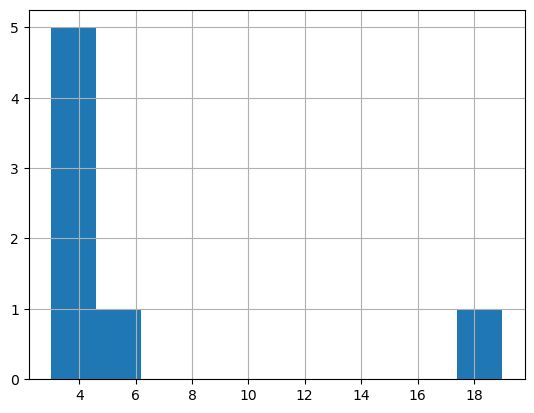

In [8]:
#Bare bones frequency histogram of a series:

datapd.hist()

#Note: If we were working with a DataFrame instead we would use  df.hist(column="ColName")

Text(0, 0.5, 'Frequency')

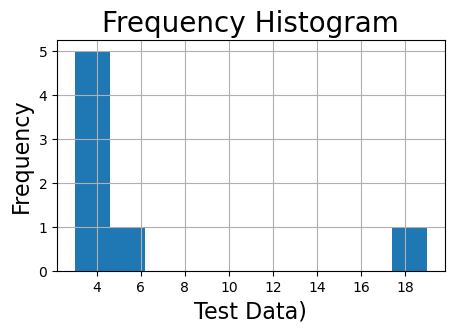

In [9]:
#Adding titles and changing size, etc:  

# Initialize figure and axis
fig, ax= plt.subplots(figsize=(5,3))  #See below for more details on this 
                                    #ax is just a variable name of your creation
datapd.hist()

# Add a title
ax.set_title("Frequency Histogram", fontsize=20)

# Add axis labels 
ax.set_xlabel("Test Data)", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)



Note:
`plt.subplots()` is a function that returns a tuple containing a figure and axes object(s). Thus when using `fig, ax = plt.subplots()` you unpack this tuple into the variables `fig` and `ax`.

Having fig is useful if you want to change figure-level attributes or save the figure as an image file later (e.g. with `fig.savefig('yourfilename.png'))`.

You certainly don't have to use the returned figure object but many people do use it later so it's common to see. Also, all axes objects (the objects that have plotting methods), have a parent figure object anyway, thus: 

`fig, ax = plt.subplots()` is more concise than:

`fig = plt.figure()`

`ax = fig.add_subplot(111)`

Documentation on `plt.sublots` and `ax=ax`:  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

Notice if you were working with a DataFrame you would call the `hist( )` function on the entire DataFrame and then indicate which column we want to use using the $\texttt{column}$ option.

Finally, we pass in the figure axis to the function so that we can make modifications to the layout later on. 


#### Bin Size

Caution:  The shape of your histogram can be easily influenced by your bin size and the starting value of your bins.  

Example:  The following are 3 different histograms of the SAME Old Faithful eruption duration data.  These 3 different bin choices tell 3 very different stories about the data:

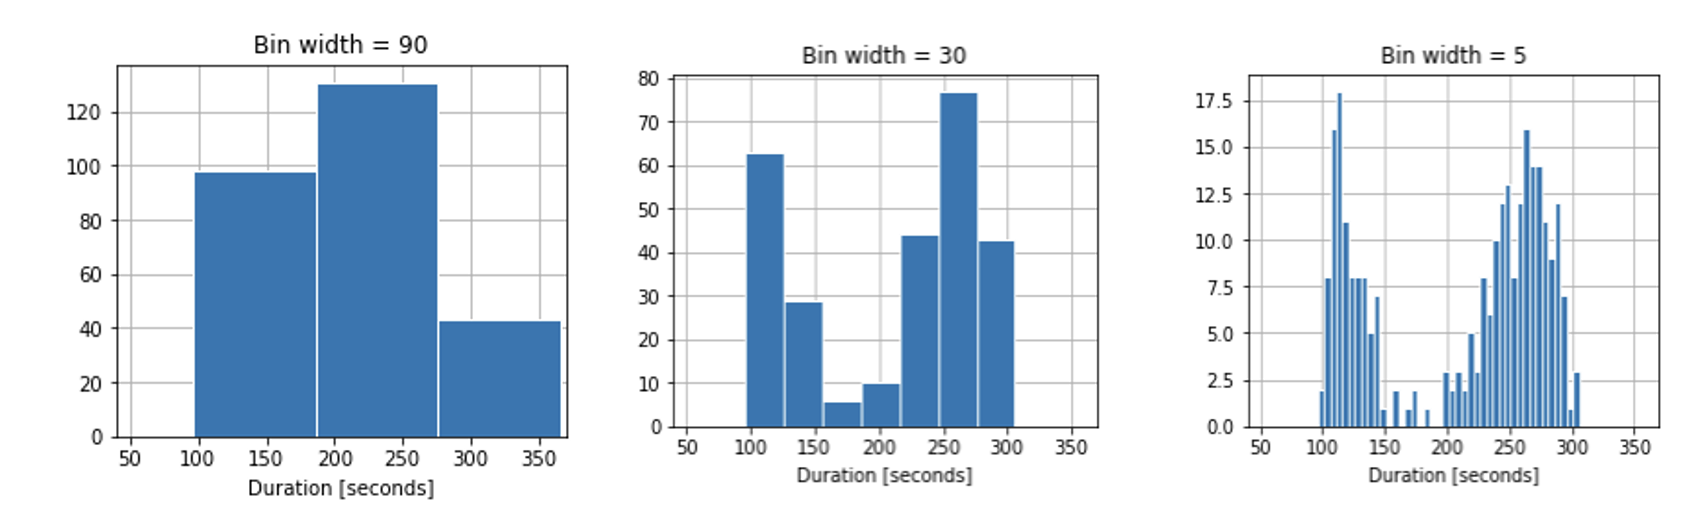

The default bin setting in Pandas is to just use 10 bins spanning the data.  This isn't always the best depending on the data.

There are a variety of rules of thumb for how to pick the best interval width. 
(See here for some of them: https://onlinestatbook.com/2/graphing_distributions/histograms.html )

***The best advice is to experiment with different choices of width, and to choose a histogram according to how well it communicates the shape of the distribution***.


If you want to define your own bins you can do so by passing in an optional $\texttt{bins}$ argument to `hist( )`.  The two options are to pass in an integer value for the number of bins you want _or_ a list specifying the bin edges. 

Suppose for example we want bins of width 1 starting at 2 and ending at 20.  We could do the following:  

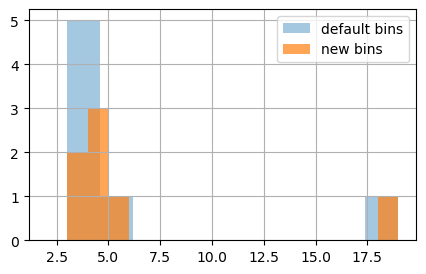

In [10]:
fig, ax = plt.subplots(figsize=(5,3))


datapd.hist(label='default bins',alpha=0.4)

my_bins = range(2,20,1)
datapd.hist(bins=my_bins, label='new bins',alpha=0.7)

ax.legend()

Next, try to pass the parameter **density=True** into the hist( ) function and redo the plot.   
How does the **density=True** parameter change the histograms? 

In [ ]:
#To Do



Notice all that changed is the scale on the y-axis.  Density histograms are designed so that the total area of the histogram is 1.  

#### Histograms come in a variety of shapes:

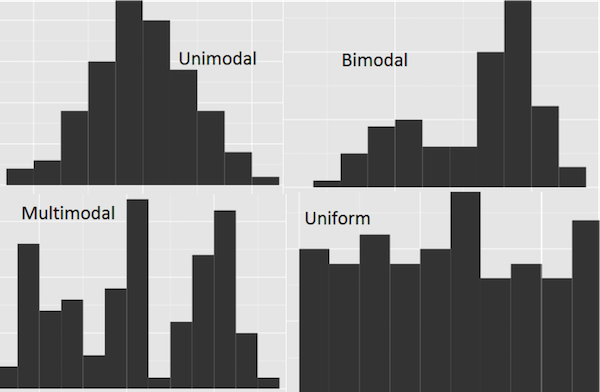




### B)  Box-and-Whisker plots (aka Boxplots)




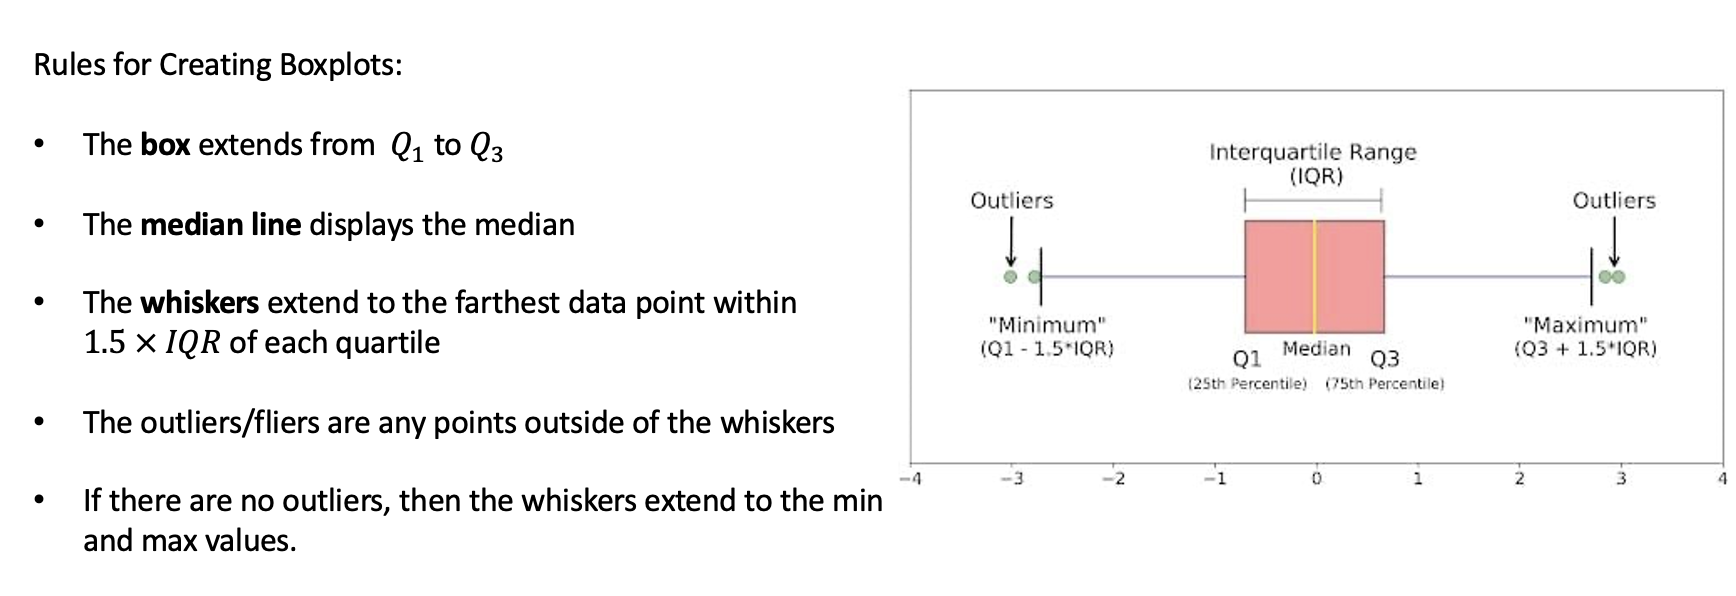

Boxplots can be displayed vertically or horizontally:

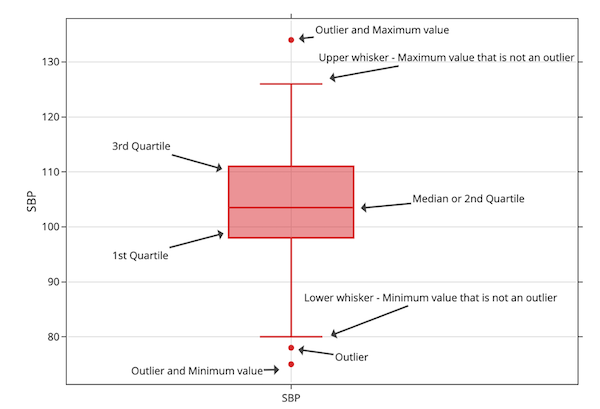


In [ ]:
# Initialize figure and axis
fig, ax= plt.subplots(figsize=(3,4))


datapd.plot.box()

# Add a title
ax.set_title("Box and Whisker Plot", fontsize=20)

# Add axis labels 
ax.set_xlabel("Test Data", fontsize=16)


#Of if using a DataFrame:
#DataFrame.boxplot(column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None, backend=None, **kwargs)[source]


#### Skew

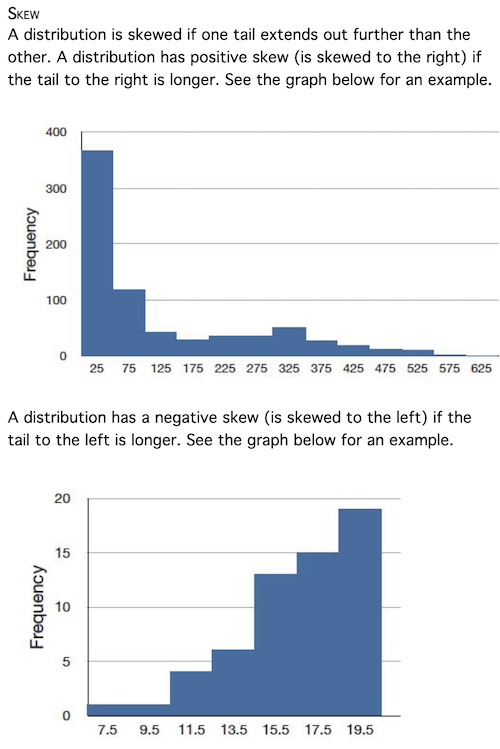

There are multiple definitions for how to quantify skew mathematically.  Pandas uses the following definition:





In [ ]:
my_bins = range(2,20,1)

datapd.hist(bins=my_bins)
print("The skew of this distribution is:", datapd.skew())

## Upping our Plotting Game

Let's examine how we can plot histograms and boxplots using DataFrames, as well as how we can adjust/improve the outputs of our plots.

First, load the "clean_boulder_weather.csv" weather data into a Pandas DataFrame using read_csv( ).  

Remember to change the file_path variable to point to the correct location. 

In [ ]:
# Path to data 
file_path = 'clean_boulder_weather.csv'

# Load the data into a DataFrame 
dfW = pd.read_csv(file_path)

# Inspect some of the data
dfW.head()

Recall that the data has the following columns: 

- **STATION**: The unique identification code for each weather station 
- **NAME**: The location / name of the weather station 
- **DATE**: The date of the observation 
- **PRCP**: The precipitation (in inches)
- **TMAX**: The daily maximum temperature (in Fahrenheit)
- **TMIN**: The daily minimum temperature (in Fahrenheit)

The data set contains data from several weather stations.  Their names are

In [ ]:
station_names = list(set(dfW["NAME"]))
print("Station Names: ", station_names)

type(station_names)

### Histograms of Maximum Temperature 

Understanding data better, quickly, involves looking at a picture of the data.

Consider drawing a $\color{red}{\text{histogram}}$ of the **TMAX** characteristics over $\color{red}{\text{all weather stations}}$.

There are several ways to plot histograms in Python.  We will use Pandas built-in histogram function because it is designed to handle missing data well.

Note:
`plt.subplots()` is a function that returns a tuple containing a figure and axes object(s). Thus when using `fig, ax = plt.subplots()` you unpack this tuple into the variables `fig` and `ax`.

Having fig is useful if you want to change figure-level attributes or save the figure as an image file later (e.g. with `fig.savefig('yourfilename.png'))`.

You certainly don't have to use the returned figure object but many people do use it later so it's common to see. Also, all axes objects (the objects that have plotting methods), have a parent figure object anyway, thus: 

`fig, ax = plt.subplots()` is more concise than:

`fig = plt.figure()`

`ax = fig.add_subplot(111)`

Documentation on `plt.sublots` and `ax=ax`:  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

Notice that we call the `hist( )` function on the entire DataFrame and then indicate which column we want to use using the $\texttt{column}$ option.

Finally, we pass in the figure axis to the function so that we can make modifications to the layout later on. 

In [ ]:
# Initialize figure and axis
fig, ax = plt.subplots(figsize=(8,4))   # ax is just a variable name of your creation

# Plot histogram 
dfW.hist(column="TMAX", ax=ax);         # The first ax is a keyword taking on the variable ax (second ax).


#We could have also done something like this:
#fig, donkey = plt.subplots(figsize = (8,4)) 

#dfW.hist(column="TMAX", ax=donkey);  

# point being, 'ax' is a variable name and a reserved word.

Tada! we've made a bare-bones histogram of the **TMAX** data using Pandas' `hist( )` function.

### Exercise 1
***
Suppose for example we want bins of width 5 starting at 50 and ending at 105.  Replot this as a **density** histogram with these bins:

In [ ]:
my_bins = range(50,110,5)
print("bin edges = ", list(my_bins))

We can also add loads of options to make the plot more appealing to the eye.  

In [ ]:
# Initialize figure 
fig, ax = plt.subplots(figsize=(8,4))

# Plot histogram with custom colors
mycolor =np.array([230,30,30])/255
dfW.hist(column="TMAX", ax=ax, bins=my_bins, facecolor=mycolor, edgecolor="blue")

# Add a title
ax.set_title("Boulder County Max Temperatures", fontsize=20)

# Add axis labels 
ax.set_xlabel("Max Temperature (in Fahrenheit)", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)

# Make the grid lines lighter and put them behind data 
ax.grid(alpha=0.25)
ax.set_axisbelow(True)


Finally, side-by-side or stacked histograms are a great way to compare two sets of data.  


Let's create histograms of **TMAX** for data from two different weather stations.  For this experiment we'll use the data from the Niwot and Sugarloaf weather stations. 

***Option 1:  Stacking on the same axes***

In [ ]:

my_bins = range(50,110,3)
fig, ax = plt.subplots(figsize=(12,6))
dfW.loc[dfW["NAME"]=="NIWOT, CO US"].hist(column="TMAX", ax=ax, edgecolor="white",bins=my_bins, alpha=0.5, label="Niwot")
dfW.loc[dfW["NAME"]=="SUGARLOAF COLORADO, CO US"].hist(column="TMAX", ax=ax,  edgecolor="white",bins=my_bins, alpha=0.3, label="Sugarloaf")
ax.set_xlabel("Max Temperature [degrees F]", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)
ax.set_title("Temperature Comparison", fontsize=24)
ax.grid(alpha=0.25)

ax.set_axisbelow(True)
ax.legend();



***Option 2: Stacking Vertically***

Note that in order to make a true comparison it's a good idea to set the range on the horizontal and vertical $\color{red}{\text{axes to be the same on both plots}}$. 

In [ ]:
# Initialize figure subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,8))
# nrows=2, ncols=1 means the histograms will be stacked in 2 rows with 1 column

# --------------------------------------
# Plot histogram for Niwot on Top 
# --------------------------------------
dfW.loc[dfW["NAME"]=="NIWOT, CO US"].hist(column="TMAX", ax=axes[0], facecolor="steelblue", edgecolor="white")
# ax=axes[0] implies the first of 2 histograms which are indexed as 0 and 1.

# Add titles and labels 
axes[0].set_title("Niwot Max Daily Temperatures", fontsize=20)
axes[0].set_xlabel("Max Temperature [degrees F]", fontsize=16)
axes[0].set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
axes[0].grid(alpha=0.25)
axes[0].set_axisbelow(True)

# --------------------------------------
# Plot histogram for Sugarloaf on Bottom 
# --------------------------------------
dfW.loc[dfW["NAME"]=="SUGARLOAF COLORADO, CO US"].hist(column="TMAX", ax=axes[1], facecolor="green", edgecolor="white")
# ax=axes[1] implies the second of 2 histograms which are indexed as 0 and 1.

# Add titles and labels 
axes[1].set_title("Sugarloaf Max Daily Temperatures", fontsize=20)
axes[1].set_xlabel("Max Temperature [degrees F]", fontsize=16)
axes[1].set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
axes[1].grid(alpha=0.25)
axes[1].set_axisbelow(True)

# --------------------------------------
# Make the plots comparable 
# --------------------------------------

# Set x and y axis limits to match
axes[0].set_xlim([50,95])
axes[1].set_xlim([50,95])

axes[0].set_ylim([0,9])
axes[1].set_ylim([0,9]);

# Adjust vertical space so titles/axis labels don't overlap 
fig.subplots_adjust(hspace=.5)



Note that because we set the horizontal and vertical axis ranges to be the same we can easily make $\color{red}{\text{visual comparisons}}$ between the data.  For instance it is crystal clear that that it tends to be hotter in general in Sugarloaf than in Niwot. 

### Exercise 2
***
Make stacked histograms to compare the minimum temperatures at $\color{red}{\text{Gross Resevoir}}$ and $\color{blue}{\text{Ralston Resevoir}}$.  Play around with the different parameters until you find a style and color scheme that you like.  Don't forget to add meaningful titles and axis labels! 


In [ ]:
#To Do

After you've gotten some decent _Frequency_ histograms, pass the parameter **density=True** into the hist( ) function and redo the plots.  Note that you'll probably have to change the vertical axis limits.  How does the **density=True** parameter change the histograms? 

In [ ]:
#To Do

**Question to ponder:**  A ***density*** histogram has the sum of the boxes equal to 1.  You should have found that the density histogram for Gross Reservoir is **shorter** than that for Ralston Reservoir.
1. What then must be true about their relative **widths**?
1. What does this mean about the **range** of temperatures observed at the two locations?

**Solution:**

1. Gross Res has a shorter density histogram, so it must be **wider** than Ralston Res, since the areas of the two both are 1.
2. This means that we observe a wider range of temperatures at Gross Res than at Ralston Res.

### Box-and-Whisker Plots of Minimum Temperature 
***

Next we'll look at Pandas' box-and-whisker plot functionality using the $\color{red}{\text{boxplot( ) }}$function.  We'll start by making a box-and-whisker plot for Niwot's minimum daily temperatures. Like the hist( ) function, boxplot( ) is called on the entire DataFrame, and then we specify which column we're interested in using the **column** parameter. 

$\color{blue}{\text{Subplot grid parameters are encoded as a single integer.}}$
$\color{blue}{\text{For example, "111" means "1x1 grid, first subplot",
while "234" means "2x3 grid, 4th subplot".}}$

In [ ]:
# Initialize figure 
fig = plt.figure(figsize=(6,6))

# Get axis object 
ax = fig.add_subplot(111)

# Plot histogram 
dfW.loc[dfW["NAME"]=='GROSS RESERVOIR, CO US'].boxplot(column="TMIN", ax=ax);

Note that the result is a standard box-and-whiskers plot with a box spanning the distance between the lower and upper quartiles, a (barely perceptible) median line, whiskers and caps, and outliers that fall more than $1.5 \times IQR$ outside of the nearest quartile. 

Unfortunately, the default parameters don't lend themselves well to easy-to-read plots, so we'll make a few tweaks.
Documentation:  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html

In [ ]:
# Initialize figure 
fig, ax = plt.subplots(figsize=(6,6))

# Plot histogram, but this time return dictionary of style parameters for modification after the fact 
bp = dfW.loc[dfW["NAME"]=='GROSS RESERVOIR, CO US'].boxplot(column="TMIN", ax=ax, widths=[.2], return_type='dict');

# ---------------------------------------
# Set properties of various parts of plot 
# ---------------------------------------

# Change properties of boxes 
for box in bp['boxes']:
    box.set(color='steelblue', linewidth=2)
    
# Change properties of whiskers 
for whisker in bp['whiskers']:
    whisker.set(color='gray', linewidth=2)
    
# Change properties of caps 
for cap in bp['caps']:
    cap.set(color='gray', linewidth=2)
    
# Change properties of median 
for cap in bp['medians']:
    cap.set(color='green', linewidth=2, alpha=0.5)
    
# Change properties of fliers (outliers) 
for flier in bp['fliers']:
    flier.set(markerfacecolor='steelblue', linewidth=2, marker='s', markersize=6, alpha=0.5)

# Set title and vertical axis label
ax.set_title('GROSS RESERVOIR, CO US', fontsize=18)
ax.set_ylabel("Min Temperature (in degrees F)", fontsize=16)

# Make grid-lines lighter
ax.grid(alpha=0.25)

Notice that in the default settings for boxplot( ) the length of the whiskers are set equal to the largest distance between an observation and the upper or lower quartile that is less than $1.5 \times IQR$.  Any data point beyond this distance is drawn as an outlier (or a _flier_ as Pandas calls them).   

Box-and-whisker plots are great for $\color{red}{\text{visualizing}}$ the spread of the data, outliers, and skew of the data.  For instance, from this box-and-whisker plot we can tell that the minimum temperature at Gross Reservoir has a $\color{red}{\text{positive skew}}$ because the the upper quartile $Q_3$ is farther from the median than the lower quartile $Q_1$ is from the median. 

Box-and-whisker plots are especially useful for comparing multiple sets of observations.  For instance, the following side-by-side box-and-whisker plots compare the minimum temperature at Gross Reservoir and Ralston Reservoir. 

Note that the trick here is to select the rows of the DataFrame corresponding only to Gross Reservoir and Ralston Reservoir and then call boxplot( ) with the **by** parameter to break the data into the two sets based on the value of the **NAME** column.  

In [ ]:
# Initialize figure 
fig, ax = plt.subplots(figsize=(5,8))

# To get just the columns corresponding to Gross and Ralston reservoirs, we 
# select only the rows of the DataFrame coresponding to those names, then 
# call boxplot and pass by="NAME" to break the data into the two sets 
bp = dfW.loc[(dfW["NAME"]=='GROSS RESERVOIR, CO US') | (dfW["NAME"]=='RALSTON RESERVOIR, CO US')].boxplot(
    column=["TMIN"], by="NAME", ax=ax, widths=[.25, .25], return_type="dict")

# This time, bp is a Pandas series containing multiple dictionaries
# corresponding to the two sets of data. We loop over each one individually 
# and set the parameters we want 
for column in bp:
    
    # Change properties in boxes 
    for box in column['boxes']:
        box.set(color='steelblue', linewidth=2)
    
    # Change properties of whiskers 
    for whisker in column['whiskers']:
        whisker.set(color='gray', linewidth=2)

    # Change properties of caps 
    for cap in column['caps']:
        cap.set(color='gray', linewidth=2)

    # Change properties of median 
    for cap in column['medians']:
        cap.set(color='green', linewidth=2, alpha=0.5)

    # Change properties of fliers (outliers) 
    for cap in column['fliers']:
        cap.set(markerfacecolor='steelblue', linewidth=2, marker='s', markersize=6, alpha=0.5)

# Set title and vertical axis label
ax.set_title('GROSS vs. RALSTON RESERVOIRS', fontsize=18)
ax.set_ylabel("Min Temperature (in F)", fontsize=16)

# Set names of plots
plt.xticks([1,2],["Gross", "Ralston"], rotation=0, fontsize=16)

# Get rid of automatically generated titles and xlables
plt.suptitle("")
ax.set_xlabel("")

# Make grid-lines lighter
ax.grid(alpha=0.25);

From the side-by-side box-and-whiskers plots we can easily see several things 

- the median min daily temperature at Ralston Reservoir is more than 10 degrees warmer than that at Gross Reservoir
- the min daily temperature at Gross Res is positively skewed, while the min daily temperature at Ralston Res is slightly negatively skewed 
- while the overall spreads of the two data sets are approximately equal, there is more variability in the middle 50% of the min daily temp at Gross Res than in the middle 50% of the min daily temp at Ralston Res

### Exercise 3
***

Plot side-by-side box and whisker plots of the max daily temperature in Niwot and Sugarloaf.  Comment on any similarities and differences that you see in the distributions of the data. 

In [ ]:
#To Do

### Exercise 4
***

Plot side-by-side box and whisker plots of the precipitation measured at **all** weather stations where we have precipitation data (**hint**: it's not all of them).  Mess with the plot parameters until you get a reasonable graphic that doesn't look too cramped.  Note that it might be helpful to make the figure much wider and rotate the horizontal labels 90 degrees. 

In [ ]:
#To Do